In [1]:
# %load_ext autoreload
# %autoreload 2
%reload_ext autoreload

# ---- Make sure Python can find your 'scripts' folder ----
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt
# Start at the current notebook folder and walk up a few levels
here = Path.cwd()
root = here
for _ in range(5):
    if (root / "scripts" / "wrangle.py").exists():
        # Add BOTH the project root and the scripts folder to sys.path
        sys.path.insert(0, str(root))
        sys.path.insert(0, str(root / "scripts"))
        break
    root = root.parent

print("Detected project root:", root)
print("wrangle.py exists:", (root / "scripts" / "wrangle.py").exists())

# import should work
import importlib, scripts.wrangle as wr


Detected project root: c:\Users\Okoko\Desktop\DATA ANALYSIS PROJECT\World_quant_university\BuenosAires_Apartment_Project
wrangle.py exists: True


In [5]:
df = wr.wrangle('./../data/buenos-aires-real-estate-1.csv')
df.head()

c:\Users\Okoko\Desktop\DATA ANALYSIS PROJECT\World_quant_university\BuenosAires_Apartment_Project\scripts\wrangle.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[mask_prop & mask_prop_type & mask_price & mask_size]


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...


Text(0.5, 1.0, 'Distribution of apartments Size in Capital Federal')

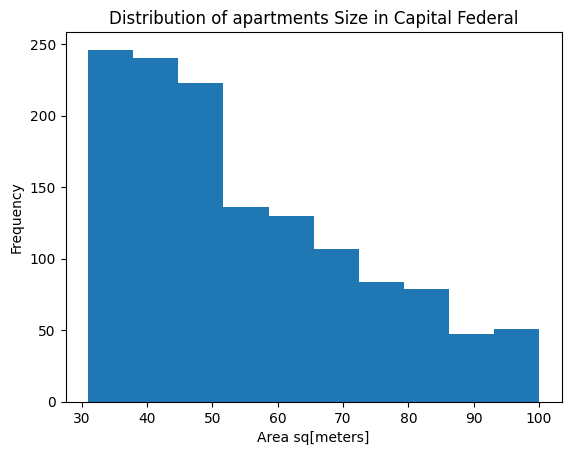

In [10]:
plt.hist(df['surface_covered_in_m2']);
plt.xlabel('Area sq[meters]')
plt.ylabel('Frequency')
plt.title('Distribution of apartments Size in Capital Federal')

C:\Users\Okoko\AppData\Local\Temp\ipykernel_7328\1276466239.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


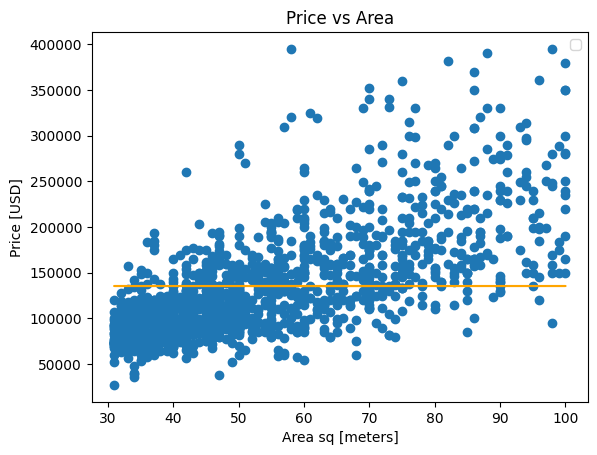

In [21]:
#Price vs Area
price_avg_df = [df['price_aprox_usd'].mean()] * len(df['surface_covered_in_m2'])
plt.plot(df['surface_covered_in_m2'], price_avg_df , color='orange')
plt.scatter(df['surface_covered_in_m2'], df['price_aprox_usd'])
plt.title('Price vs Area')
plt.xlabel('Area sq [meters]')
plt.ylabel('Price [USD]')
plt.legend();